# Reliability 

## Import libraries

In [2]:
pip install reliability

  Using cached autograd-gamma-0.5.0.tar.gz (4.0 kB)
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4039 sha256=01a7878c0b781fa18d545444233c3cdf23a2d5248ff89a9e7b2fab77cce1379a
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\16\a2\b6\582cfdfbeeccd469504a01af3bb952fd9e7eccba40995eafea
Successfully built autograd-gamma
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install --upgrade reliability

**1. Análisis de Distribución de Vida (Life Data Analysis)**   
- Se emplea para ajustar datos de fallas a distribuciones estadísticas como Weibull, Normal, Lognormal, Exponencial, entre otras.   
- Permite estimar la probabilidad de falla y el tiempo medio hasta la falla (MTTF)   
Ejemplo: Ajuste de distribución Weibull a datos de fallas

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 8/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha           310.4         43.4848   235.871   408.479
     Beta         2.65586        0.768024    1.5068   4.68119 

Goodness of fit    Value
 Log-likelihood -49.0774
           AICc  104.555
            BIC  102.314
             AD  1.65601 



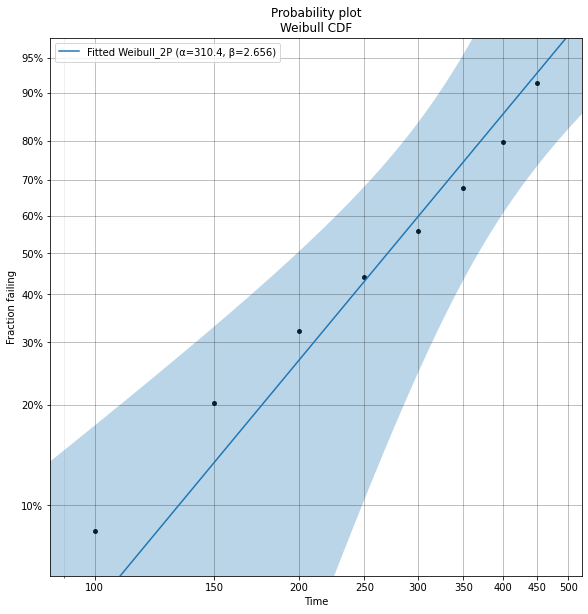

In [3]:
from reliability.Fitters import Fit_Weibull_2P
from reliability.Distributions import Weibull_Distribution
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

failure_data = [100, 150, 200, 250, 300, 350, 400, 450]  # Tiempos de falla
fit = Fit_Weibull_2P(failures=failure_data, show_probability_plot=True)

plt.show()

NameError: name 'dist' is not defined

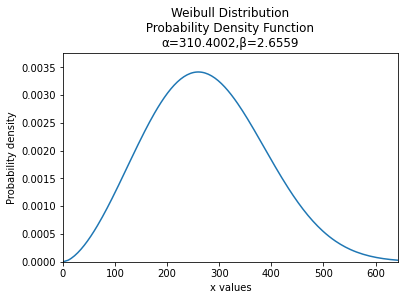

In [13]:

fit.distribution.PDF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
dist.PDF(label='original distribution', linestyle='--') # plots the survival function of the original distribution
plot_points(failures=failure_datadata, func='PDF')  # overlays the original data on the survival function
plt.legend()
plt.show()

**2. Cálculo de Confiabilidad y Probabilidad de Falla**
- Se usa para estimar la confiabilidad de un sistema en función del tiempo.   
- Útil en mantenimiento predictivo para anticipar fallos.   
Ejemplo: Confiabilidad de un componente a los 500 horas

In [4]:
from reliability.Distributions import Weibull_Distribution

weibull = Weibull_Distribution(alpha=300, beta=1.5)  # Parámetros de Weibull
reliability_at_500 = weibull.SF(500)  # Función de supervivencia
print(f'Confiabilidad a 500 horas: {reliability_at_500:.4f}')

Confiabilidad a 500 horas: 0.1163


**3. Análisis de Sistemas en Serie y Paralelo**
- Se modelan sistemas compuestos por múltiples componentes con diferentes configuraciones de redundancia.   
- Ejemplo: Sistema en serie de 3 componentes

In [6]:
from reliability.Systems import series_system

reliabilities = [0.9, 0.8, 0.85]  # Confiabilidad de cada componente
system_reliability = series_system(R=reliabilities)
print(f'Confiabilidad del sistema en serie: {system_reliability:.4f}')

ModuleNotFoundError: No module named 'reliability.Systems'

**4. Modelado de Mantenimiento Preventivo**
- Se usa para determinar la tasa óptima de reemplazo de componentes.   
Ejemplo: Optimización del tiempo de mantenimiento basado en Weibull

In [7]:
from reliability.Repairable_systems import optimal_replacement_time
from reliability.Distributions import Weibull_Distribution

failure_distribution = Weibull_Distribution(alpha=5000, beta=1.5)  # Modelo de falla
optimal_time = optimal_replacement_time(failure_distribution)
print(f'Tiempo óptimo de reemplazo: {optimal_time:.2f} horas')


TypeError: __init__() missing 3 required positional arguments: 'cost_CM', 'weibull_alpha', and 'weibull_beta'

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 8/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha           310.4         43.4848   235.871   408.479
     Beta         2.65586        0.768024    1.5068   4.68119 

Goodness of fit    Value
 Log-likelihood -49.0774
           AICc  104.555
            BIC  102.314
             AD  1.65601 



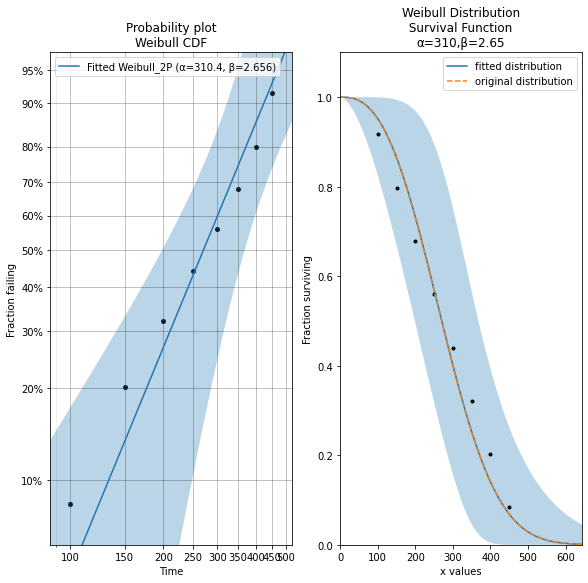

In [18]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=310, beta=2.65)  # creates the distribution object
data = [100, 150, 200, 250, 300, 350, 400, 450]  # draws 20 samples from the distribution. Seeded for repeatability
plt.subplot(121)
fit = Fit_Weibull_2P(failures=data)  # fits a Weibull distribution to the data and generates the probability plot
plt.subplot(122)
fit.distribution.SF(label='fitted distribution')  # uses the distribution object from Fit_Weibull_2P and plots the survival function
dist.SF(label='original distribution', linestyle='--') # plots the survival function of the original distribution
plot_points(failures=data, func='SF')  # overlays the original data on the survival function
plt.legend()
plt.show()

## Creating and plotting distributions

### Example 1.    
Crear una funcion caracteristica, en este caso PDF de la distribución

There are 8 standard probability distributions available in reliability.Distributions. These are:

Weibull Distribution (α, β, γ)

Exponential Distribution (λ, γ)

Gamma Distribution (α, β, γ)

Normal Distribution (μ, σ)

Lognormal Distribution (μ, σ, γ)

Loglogistic Distribution (α, β, γ)

Gumbel Distribution (μ, σ)

Beta Distribution (α, β)

Understanding how to create and plot distributions is easiest with an example.    
- In this first example, we will create a Weibull Distribution with parameters alpha = 50 and beta = 2.   
- We will then plot the PDF of the distribution.

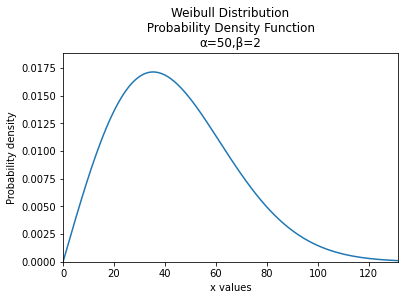

In [15]:
from reliability.Distributions import Weibull_Distribution
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=50, beta=2)  # this created the distribution object
dist.PDF()  # this creates the plot of the PDF
plt.show()

### Example 2. Graficar las Cinco Funciones Características

Just as easily as we plotted the PDF in the above example, we can plot any of the 5 characteristic functions (PDF, CDF, SF, HF, CHF).       
If you would like to view all of these functions together, you can use the plot() method.   
In this second example, we will create a Lognormal Distribution with parameters mu=2 and sigma=0.5.   From this distribution, we will use the plot() method to visualise the five functions and also provide a summary of the descriptive statistics.

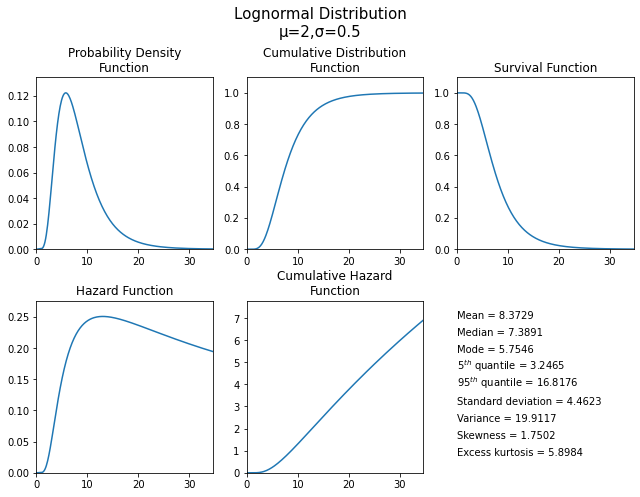

In [14]:
from reliability.Distributions import Lognormal_Distribution

dist = Lognormal_Distribution(mu=2,sigma=0.5)
dist.plot()

### Example 3 - Calculate Reliability


Each of the 5 functions (PDF, CDF, SF, HF, CHF) will always return the y-values for a given set of x-values (xvals).   
In this example, we want to know the value of the Survival Function at x=20.

In [20]:
from reliability.Distributions import Weibull_Distribution

dist = Weibull_Distribution(alpha=50, beta=2)
sf = dist.SF(20)
print('The value of the SF at 20 is', round(sf * 100, 2), '%') # we are converting the decimal answer (0.8521...) to a percentage

'''
The value of the SF at 20 is 85.21 %
'''

The value of the SF at 20 is 85.21 %


'\nThe value of the SF at 20 is 85.21 %\n'

### Example 4. Create a bathtub curve(Crear Curva bañera )

As a final example, we will create a bathtub curve by creating and layering several distributions.   
The bathtub curve is only for the Hazard function as it shows how a variety of failure modes throughout the life of a population can shape the hazard into a bathtub shape.    
The three distinct regions are infant mortality, random failures, and wear out.   
In this example, the returned y-values are added together to produce the ‘combined’ array which is then plotted using matplotlib against the xvals.    
By specifying xvals in each HF we can ensure that the xvals used will all align. Leaving xvals unspecified would not be appropriate in this example as the default xvals will depend on the shape of the plot.

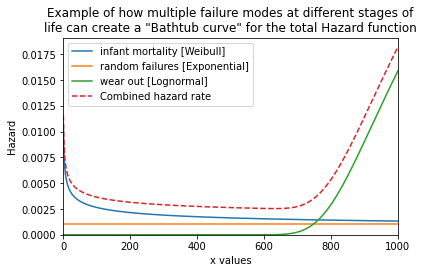

In [21]:
from reliability.Distributions import Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution
import matplotlib.pyplot as plt
import numpy as np
xvals = np.linspace(0,1000,1000)
infant_mortality = Weibull_Distribution(alpha=400,beta=0.7).HF(xvals=xvals,label='infant mortality [Weibull]')
random_failures = Exponential_Distribution(Lambda=0.001).HF(xvals=xvals,label='random failures [Exponential]')
wear_out = Lognormal_Distribution(mu=6.8,sigma=0.1).HF(xvals=xvals,label='wear out [Lognormal]')
combined = infant_mortality+random_failures+wear_out
plt.plot(xvals,combined,linestyle='--',label='Combined hazard rate')
plt.legend()
plt.title('Example of how multiple failure modes at different stages of\nlife can create a "Bathtub curve" for the total Hazard function')
plt.xlim(0,1000)
plt.ylim(bottom=0)
plt.show()

### Help

If you would like access the API Reference programatically, you can use the help function within Python. 

In [22]:
from reliability.Distributions import Lognormal_Distribution
print(help(Lognormal_Distribution))

Help on class Lognormal_Distribution in module reliability.Distributions:

class Lognormal_Distribution(builtins.object)
 |  Lognormal_Distribution(mu=None, sigma=None, gamma=0, **kwargs)
 |  
 |  Lognormal probability distribution. Creates a probability distribution object.
 |  
 |  Parameters
 |  ----------
 |  mu : float, int
 |      Location parameter
 |  sigma : float, int
 |      Scale parameter. Must be > 0
 |  gamma : float, int, optional
 |      threshold (offset) parameter. Must be >= 0. Default = 0
 |  
 |  Returns
 |  -------
 |  name : str
 |      'Lognormal'
 |  name2 : 'str
 |      'Lognormal_2P' or 'Lognormal_3P' depending on the value of the gamma
 |      parameter
 |  param_title_long : str
 |      'Lognormal Distribution (μ=5,σ=2)'
 |  param_title : str
 |      'μ=5,σ=2'
 |  parameters : list
 |      [mu,sigma,gamma]
 |  mu : float
 |  sigma : float
 |  gamma : float
 |  mean : float
 |  variance : float
 |  standard_deviation : float
 |  skewness : float
 |  kurtosi

## Fitting a specific distribution to data

### Example 1. Ajuste de datos 

- To learn how we can fit a distribution, we will start by using a simple example with 30 failure times.  
- These times were generated from a Weibull distribution with α=50, β=3.    
- Note that the output also provides the confidence intervals and standard error of the parameter estimates.   
- The probability plot is generated be default (you will need to specify plt.show() to show it).   
See the section on probability plotting to learn how to interpret this plot.

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 30/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          51.858         3.55628   45.3359   59.3183
     Beta         2.80086         0.41411   2.09624   3.74233 

Goodness of fit    Value
 Log-likelihood -129.063
           AICc   262.57
            BIC  264.928
             AD 0.759805 



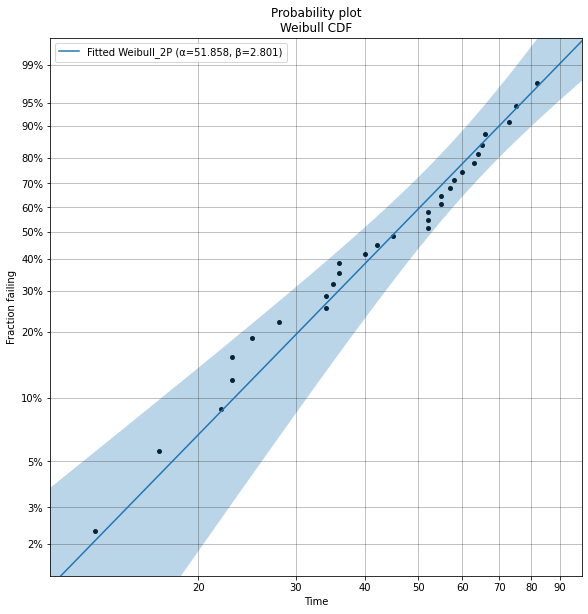

In [23]:
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt
data = [58,75,36,52,63,65,22,17,28,64,23,40,73,45,52,36,52,60,13,55,82,55,34,57,23,42,66,35,34,25] # made using Weibull Distribution(alpha=50,beta=3)
wb = Fit_Weibull_2P(failures=data)
plt.show()

The above probability plot is the typical way to visualise how the CDF (the blue line) models the failure data (the black points).

### Example 2. 

- we create some data, then fit a Weibull distribution to the data (ensuring we turn off the probability plot).    
- From the fitted distribution object we plot the Survival Function (SF).    
- We then use plot_points to generate a scatter plot of the plotting positions for the survival function.

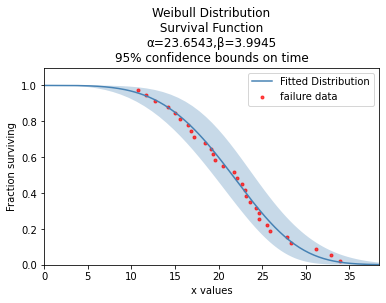

In [24]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

data = Weibull_Distribution(alpha=25,beta=4).random_samples(30)
#
weibull_fit = Fit_Weibull_2P(failures=data,show_probability_plot=False,print_results=False)
#
weibull_fit.distribution.SF(label='Fitted Distribution',color='steelblue')
plot_points(failures=data,func='SF',label='failure data',color='red',alpha=0.7)
plt.legend()
plt.show()

### Example 3.

- It is beneficial to see the effectiveness of the fitted distribution in comparison to the original distribution.   
- In this example, we are creating 500 samples from a Weibull distribution and then we will right censor all of the data above our chosen threshold.   
- Then we are fitting a Weibull_3P distribution to the data. Note that we need to specify “show_probability_plot=False, print_results=False” in the Fit_Weibull_3P to prevent the normal outputs of the fitting function from being displayed.

There are 118 right censored items.
Fit_Weibull_3P parameters:
Alpha: 28.87474386442689 
Beta: 2.029494825858332 
Gamma 20.38395968566592


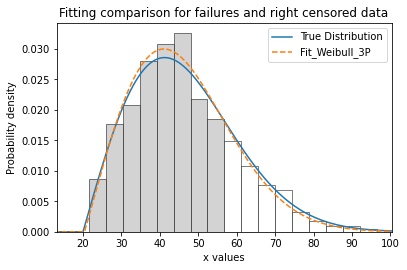

In [25]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_3P
from reliability.Other_functions import make_right_censored_data, histogram
import matplotlib.pyplot as plt

a = 30
b = 2
g = 20
threshold=55
dist = Weibull_Distribution(alpha=a, beta=b, gamma=g) # generate a weibull distribution
raw_data = dist.random_samples(500, seed=2)  # create some data from the distribution
data = make_right_censored_data(raw_data,threshold=threshold) #right censor some of the data
print('There are', len(data.right_censored), 'right censored items.')
wbf = Fit_Weibull_3P(failures=data.failures, right_censored=data.right_censored, show_probability_plot=False, print_results=False)  # fit the Weibull_3P distribution
print('Fit_Weibull_3P parameters:\nAlpha:', wbf.alpha, '\nBeta:', wbf.beta, '\nGamma', wbf.gamma)
histogram(raw_data,white_above=threshold) # generates the histogram using optimal bin width and shades the censored part as white
dist.PDF(label='True Distribution')  # plots the true distribution's PDF
wbf.distribution.PDF(label='Fit_Weibull_3P', linestyle='--')  # plots to PDF of the fitted Weibull_3P
plt.title('Fitting comparison for failures and right censored data')
plt.legend()
plt.show()

### Example 4. the accuracy of the fit is proportional to the amount of samples

As another example, we will fit a Gamma_2P distribution to some partially right censored data.   
- To provide a comparison of the fitting accuracy as the number of samples increases, we will do the same experiment with varying sample sizes.    
- The results highlight that the accuracy of the fit is proportional to the amount of samples, so you should always try to obtain more data if possible.


Fit_Gamma_2P parameters using 10 samples: 
Alpha: 19.427392277591462 
Beta: 4.689804324798566

Fit_Gamma_2P parameters using 100 samples: 
Alpha: 36.26415305512912 
Beta: 3.2929417116274187

Fit_Gamma_2P parameters using 1000 samples: 
Alpha: 28.825231892098508 
Beta: 4.062929888610025

Fit_Gamma_2P parameters using 10000 samples: 
Alpha: 30.30129158629906 
Beta: 3.960084031478935


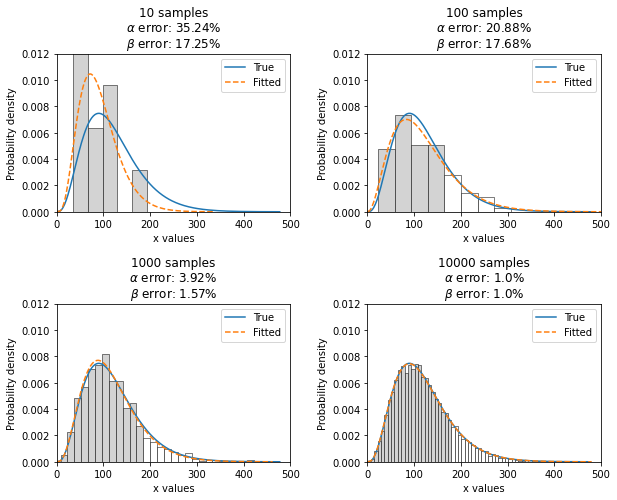

In [26]:
from reliability.Distributions import Gamma_Distribution
from reliability.Fitters import Fit_Gamma_2P
from reliability.Other_functions import make_right_censored_data, histogram
import matplotlib.pyplot as plt

a = 30
b = 4
threshold = 180  # this is used when right censoring the data
trials = [10, 100, 1000, 10000]
subplot_id = 221
plt.figure(figsize=(9, 7))
for sample_size in trials:
    dist = Gamma_Distribution(alpha=a, beta=b)
    raw_data = dist.random_samples(sample_size, seed=2)  # create some data. Seeded for repeatability
    data = make_right_censored_data(raw_data, threshold=threshold)  # right censor the data
    gf = Fit_Gamma_2P(failures=data.failures, right_censored=data.right_censored, show_probability_plot=False, print_results=False)  # fit the Gamma_2P distribution
    print('\nFit_Gamma_2P parameters using', sample_size, 'samples:', '\nAlpha:', gf.alpha, '\nBeta:', gf.beta)  # print the results
    plt.subplot(subplot_id)
    histogram(raw_data,white_above=threshold) # plots the histogram using optimal bin width and shades the right censored part white
    dist.PDF(label='True')  # plots the true distribution
    gf.distribution.PDF(label='Fitted', linestyle='--')  # plots the fitted Gamma_2P distribution
    plt.title(str(str(sample_size) + ' samples\n' + r'$\alpha$ error: ' + str(round(abs(gf.alpha - a) / a * 100, 2)) + '%\n' + r'$\beta$ error: ' + str(round(abs(gf.beta - b) / b * 100, 2)) + '%'))
    plt.ylim([0, 0.012])
    plt.xlim([0, 500])
    plt.legend()
    subplot_id += 1
plt.subplots_adjust(left=0.11, bottom=0.08, right=0.95, top=0.89, wspace=0.33, hspace=0.58)
plt.show()

### Example 5. Obtain details of the quantiles

To obtain details of the quantiles (y-values from the CDF) which include the lower estimate, point estimate, and upper estimate, we can use the quantiles input for each Fitter.    
- In this example, we will create some data and fit a Weibull_2P distribution.   
- When quantiles is specified the results printed includes both the table of results and the table of quantiles. Setting quantiles as True will use a default list of quantiles (as shown in the first output).    
- Alternatively we can specify the exact quantiles to use (as shown in the second output).    
- The use of the crosshairs function is also shown which was used to annotate the plot manually. Note that the quantiles provided are the quantiles of the confidence bounds on time. You can extract the confidence bounds on on reliability using the fitted distribution object as shown here.

Results from Fit_Weibull_2P (80% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 50/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         489.117         13.9217   471.597   507.288
     Beta         5.20798        0.589269     4.505   6.02066 

Goodness of fit    Value
 Log-likelihood -301.658
           AICc  607.571
            BIC   611.14
             AD  0.48267 

Table of quantiles (80% CI bounds on time):
 Quantile  Lower Estimate  Point Estimate  Upper Estimate
     0.01         175.215         202.212         233.368
     0.05         250.235         276.521         305.569
      0.1         292.686         317.508         344.435
      0.2         344.277         366.719         390.623
     0.25         363.578          385.05          407.79
      0.5          437.69         455.879         474.824
     0.75          502.94         520.776         539.245
      0.8        

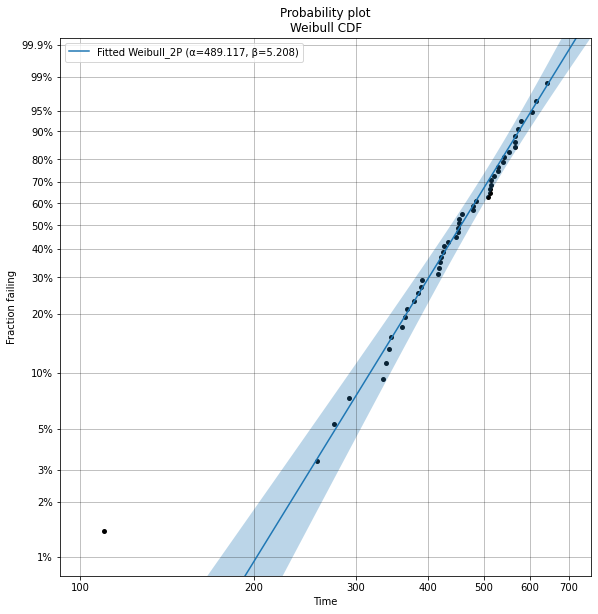

Lower estimates: [250.23461473 437.69015375 580.17421254]
Upper estimates: [305.56872227 474.82362169 628.43042835]


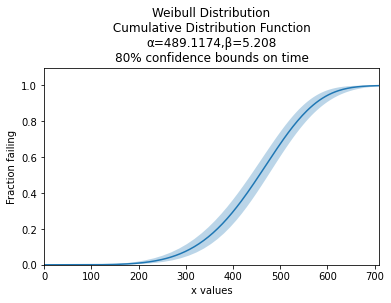

In [27]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Other_functions import crosshairs
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=500, beta=6)
data = dist.random_samples(50, seed=1)  # generate some data
# this will produce the large table of quantiles below the first table of results
Fit_Weibull_2P(failures=data, quantiles=True, CI=0.8, show_probability_plot=False)
print('----------------------------------------------------------')
# repeat the process but using specified quantiles.
output = Fit_Weibull_2P(failures=data, quantiles=[0.05, 0.5, 0.95], CI=0.8)
# these points have been manually annotated on the plot using crosshairs
crosshairs()
plt.show()

# the values from the quantiles dataframe can be extracted using pandas:
lower_estimates = output.quantiles['Lower Estimate'].values
print('Lower estimates:', lower_estimates)

#alternatively, the bounds can be extracted from the distribution object
lower,point,upper = output.distribution.CDF(CI_y=[0.05, 0.5, 0.95], CI=0.8)
print('Upper estimates:', upper)

## Fitting all available distributions to data

To fit all of the distributions available in reliability, is a similar process to fitting a specific distribution.   
The user needs to specify the failures and any right censored data.    
The Beta distribution will only be fitted if you specify data that is in the range 0 to 1 and does not include confidence intervals on the plot.   
The selection of what can be fitted is all done automatically based on the data provided. Manual exclusion of probability distributions is also possible. If you only provide 2 failures then all distributions with more than 2 parameters will automatically be excluded from the fitting process.

Confidence intervals are shown on the plots but they are not reported for each of the fitted parameters as this would be a large number of outputs. If you need the confidence intervals for the fitted parameters you can repeat the fitting using just a specific distribution and the results will include the confidence intervals. Confidence intervals are not yet available for the Weibull DS, Weibull Mixture, and Weibull CR models.

The distributions Weibull_ZI and Weibull_DSZI are not included when using Fit_Everything as these distributions are only applicable when the dataset contains zeros. If your data contains zeros you should fit these distributions individually.

### Example 1. Find the best fitting distribution

In this first example, we will use Fit_Everything on some data and will return only the dataframe of results.   
- Note that we are actively supressing the 4 plots that would normally be shown to provide graphical goodness of fit indications.    
- The table of results has been ranked by BIC to show us that Weibull_2P was the best fitting distribution for this dataset.   
- This is what we expected since the data was generated using Weibull_Distribution(alpha=50,beta=2).

***Los resultados son ordenados por la columna BIC de menor a mayor. Siendo el menor la distribución que mejor se ajusta a los datos..***

In [28]:
from reliability.Fitters import Fit_Everything
# data created using Weibull_Distribution(alpha=50,beta=2), and rounded to nearest integer
data = [92, 44, 94, 56, 54, 24, 96, 3, 27, 37, 61, 23, 70, 101, 21, 47, 4, 34, 10, 88, 37, 86, 62, 70, 21, 13, 47, 21, 57, 36, 43, 83, 42, 16, 20, 44, 43, 50, 35, 51, 35, 49, 60, 22, 34, 41, 53, 27, 44, 49]
Fit_Everything(failures=data, show_histogram_plot=False, show_probability_plot=False, show_PP_plot=False, show_best_distribution_probability_plot=False)

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 50/0 (0% right censored) 

   Distribution   Alpha    Beta  Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma    Lambda  Log-likelihood    AICc     BIC       AD optimizer
     Weibull_2P 51.1908 1.92376                                                                                         -228.338 460.932 464.501 0.613083       TNC
       Gamma_2P 16.5098 2.75836                                                                                         -229.902  464.06 467.628 0.779372       TNC
     Weibull_CR                        52.2921 1.78639 98.2941 27.1412                                                  -226.049 460.987 467.746 0.654937       TNC
     Weibull_3P 51.1908 1.92376      0                                                                                  -228.338 463.198 468.413 0.613083       TNC
     Weibull_DS 51.1908 1.92376                                             

## Example 2.

In this second example, we will create some right censored data and use Fit_Everything.    
- All outputs are shown, and the best fitting distribution is accessed and printed.

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 86/14 (14.0% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1       DS      Mu    Sigma    Lambda  Log-likelihood    AICc     BIC      AD optimizer
     Weibull_2P 11.2773 3.30301                                                                                                 -241.959 488.041 493.128  44.945       TNC
      Normal_2P                                                                               10.1194  3.37466                  -242.479 489.082 494.169 44.9098       TNC
       Gamma_2P 1.42314 7.21354                                                                                                 -243.235 490.594  495.68 45.2817       TNC
 Loglogistic_2P 9.86245 4.48433                                                                                                 -243.588 491.301 496.387 45.2002       TNC
     Weibull_DS 10.7383 3.57496      

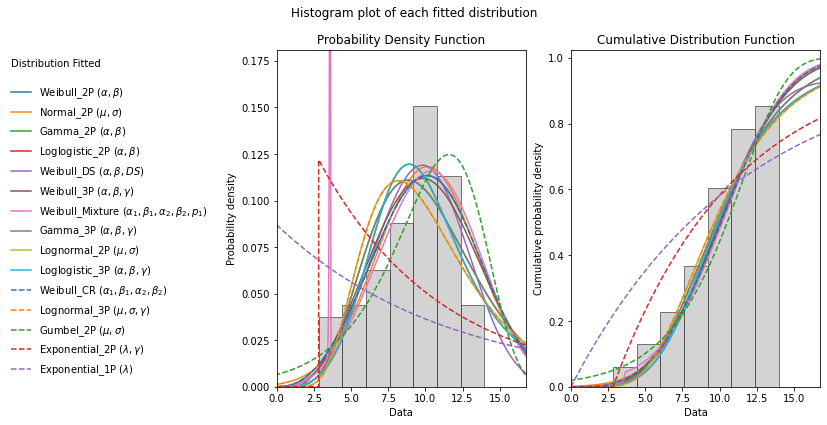

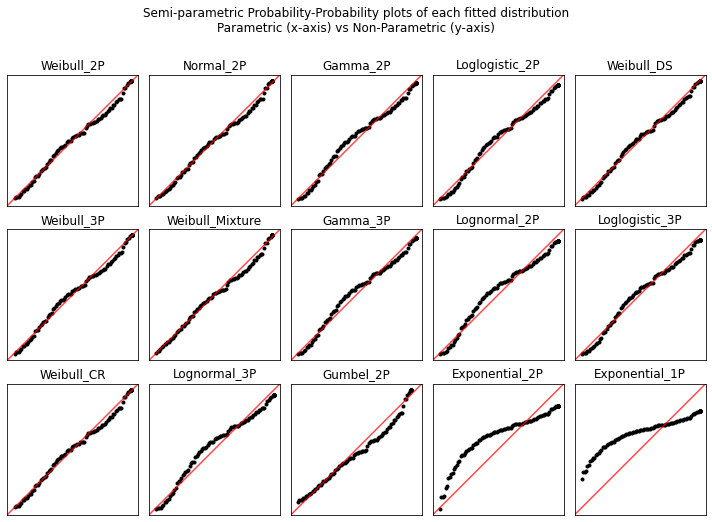

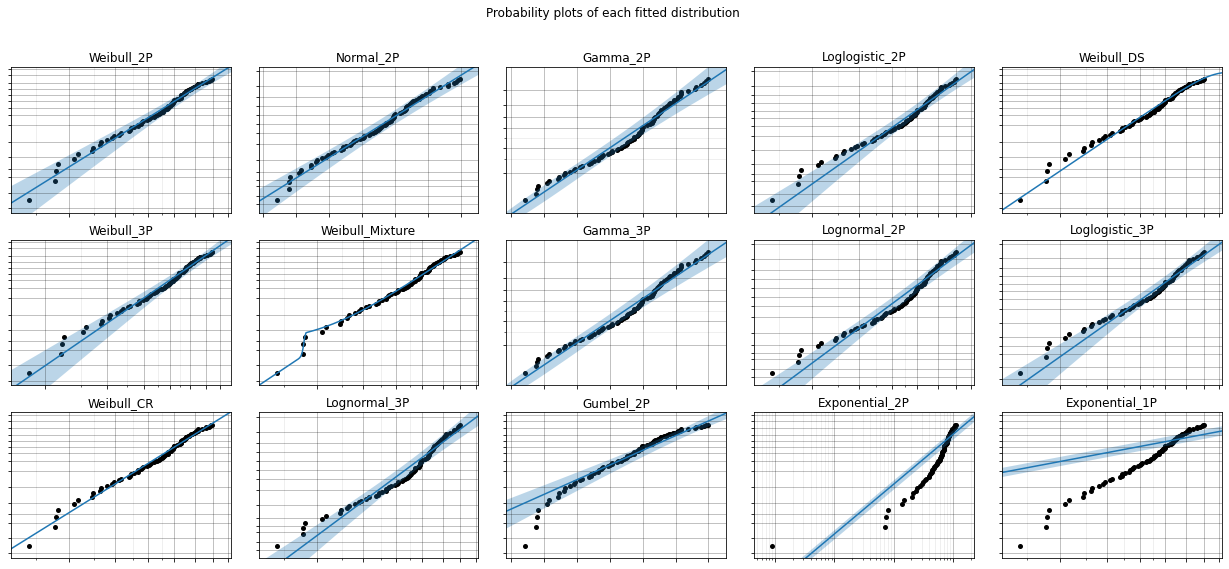

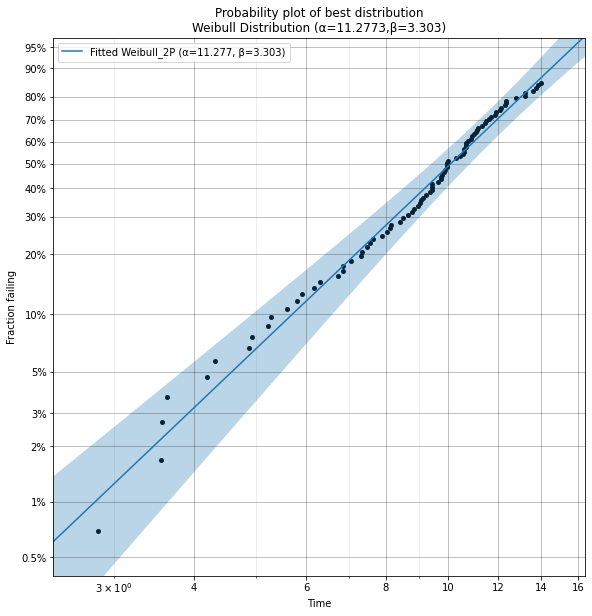

The best fitting distribution was Weibull_2P which had parameters [11.27730641  3.30300712  0.        ]


In [29]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

raw_data = Weibull_Distribution(alpha=12, beta=3).random_samples(100, seed=2)  # create some data
data = make_right_censored_data(raw_data, threshold=14)  # right censor the data
results = Fit_Everything(failures=data.failures, right_censored=data.right_censored)  # fit all the models
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)

## Working with fitted distributions


Las distribuciones de probabilidad se pueden crear especificando los parámetros o ajustando el modelo a los datos.    
La principal diferencia entre ambos objetos de distribución reside en la presencia de parámetros adicionales necesarios para generar los límites de confianza en el gráfico.   
Este documento muestra cómo se puede utilizar una distribución ajustada para realizar ciertas predicciones, centrándose en la extracción de valores de los límites de confianza.

Los parámetros adicionales que se añaden al objeto de distribución cuando lo crea un ajustador son el error estándar de cada parámetro (p. ej., alpha_SE, beta_SE) y la covarianza entre los parámetros (p. ej., Cov_alpha_beta). El intervalo de confianza también es obligatorio, aunque su valor predeterminado es 0,95 para límites de confianza del 95 %. Puede especificarse mediante el argumento CI.

The confidence bounds available are bounds on time or bounds on reliability. For an detailed explaination of how these are calculated, please see the theory document on confidence intervals. 

***he important thing to note here is that they are different, and which one you should use depends on what you want to know.***   
- If you want to know the system reliability at a certain time, then you are specifying time (CI_x) and seeking bounds on reliability (CI_type=’reliability’).   
- If you want to know the time that the system will reach a certain reliability, then you are specifying reliability (CI_y) and seeking bounds on time (CI_type=’time’).    
   
Note that these are paired, so CI_y only works with CI_type=’time’ and CI_x only works with CI_type=’reliability’. The only exception to this is the Exponential Distribution which does not accept CI_type since bounds on time and reliability are identical.

### Example 1

In this example, we see how the confidence bounds on time or reliability should be used based on what we are trying to predict

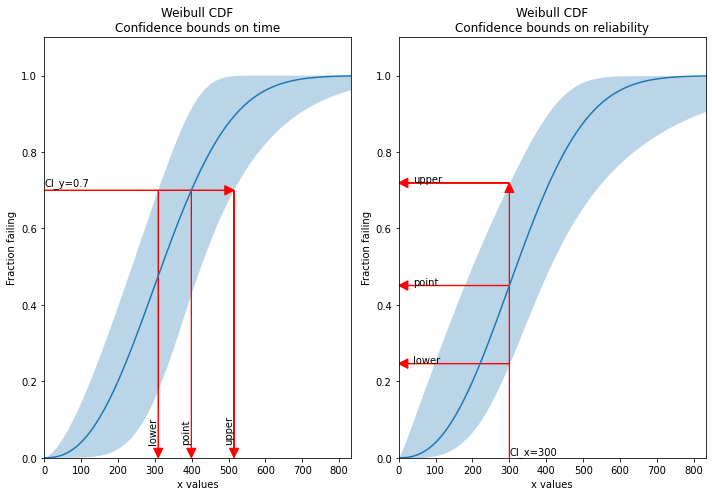

In [30]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt

dist = Weibull_Distribution(alpha=500,beta=3)
data = dist.random_samples(10,seed=1)
fit = Fit_Weibull_2P(failures=data,show_probability_plot=False,print_results=False)

plt.figure(figsize=(10,7))
plt.subplot(121)
arrow_x = 25
arrow_y = 0.025

X_lower,X_point,X_upper = fit.distribution.CDF(CI_type='time',CI_y=0.7)
plt.arrow(x=0,y=0.7,dx=X_upper,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=X_lower,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=X_point,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=X_upper,y=0.7,dx=0,dy=-0.7,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.xlim(0,dist.quantile(0.99))
plt.ylim(0,1.1)
plt.text(x=0,y=0.705,s='CI_y=0.7',va='bottom')
plt.text(x=X_lower,y=0.035,s='lower',va='bottom',ha='right',rotation=90)
plt.text(x=X_point,y=0.035,s='point',va='bottom',ha='right',rotation=90)
plt.text(x=X_upper,y=0.035,s='upper',va='bottom',ha='right',rotation=90)
plt.title('Weibull CDF\nConfidence bounds on time')

plt.subplot(122)
Y_lower,Y_point,Y_upper = fit.distribution.CDF(CI_type='reliability',CI_x=300)
plt.arrow(x=300,y=0,dx=0,dy=Y_upper,color='red',head_width=arrow_x,head_length=arrow_y,length_includes_head=True)
plt.arrow(x=300,y=Y_lower,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=300,y=Y_point,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.arrow(x=300,y=Y_upper,dx=-300,dy=0,color='red',head_width=arrow_y,head_length=arrow_x,length_includes_head=True)
plt.xlim(0,dist.quantile(0.99))
plt.ylim(0,1.1)
plt.text(x=301,y=0.001,s='CI_x=300',va='bottom')
plt.text(x=40,y=Y_lower+0.002,s='lower')
plt.text(x=40,y=Y_point+0.002,s='point')
plt.text(x=40,y=Y_upper+0.002,s='upper')

plt.title('Weibull CDF\nConfidence bounds on reliability')
plt.tight_layout()
plt.show()

### Example 2

There are 5 plots available (PDF, CDF, SF, HF, CHF) and confidence bounds are only available for 3 of them (CDF, SF, CHF).    
- The following example shows how these plots can be generated, as well as extracting the confidence bounds (the red, purple, and blue points) using CI_x and CI_y.   
- You can also turn off the confidence bounds if you set plot_CI=False

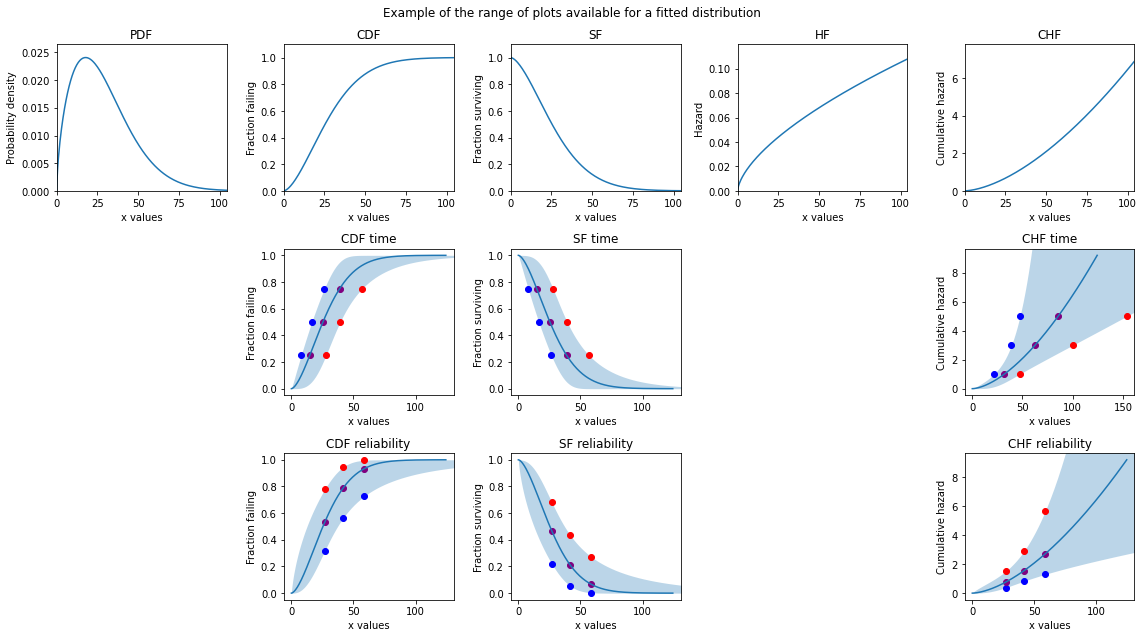

In [31]:
import matplotlib.pyplot as plt
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P

dist = Weibull_Distribution(alpha=50,beta=2)
data = dist.random_samples(10,seed=1)
fit = Fit_Weibull_2P(failures=data,show_probability_plot=False,print_results=False)
CI_x = [dist.quantile(0.25),dist.quantile(0.5),dist.quantile(0.75)]
CI_y = [0.25,0.5,0.75]

plt.figure(figsize=(16,9))
plt.subplot(3,5,1)
fit.distribution.PDF()
plt.title('PDF')

plt.subplot(3,5,2)
fit.distribution.CDF(plot_CI=False)
plt.title('CDF')

plt.subplot(3,5,7)
lower, point, upper = fit.distribution.CDF(CI_y=CI_y,CI_type='time')
plt.scatter(lower,CI_y,color='blue')
plt.scatter(point,CI_y,color='purple')
plt.scatter(upper,CI_y,color='red')
plt.title('CDF time')

plt.subplot(3,5,12)
lower, point, upper = fit.distribution.CDF(CI_x=CI_x,CI_type='rel')
plt.scatter(CI_x,lower,color='blue')
plt.scatter(CI_x,point,color='purple')
plt.scatter(CI_x,upper,color='red')
plt.title('CDF reliability')

plt.subplot(3,5,3)
fit.distribution.SF(plot_CI=False)
plt.title('SF')

plt.subplot(3,5,8)
lower, point, upper = fit.distribution.SF(CI_y=CI_y,CI_type='time')
plt.scatter(lower,CI_y,color='blue')
plt.scatter(point,CI_y,color='purple')
plt.scatter(upper,CI_y,color='red')
plt.title('SF time')

plt.subplot(3,5,13)
lower, point, upper = fit.distribution.SF(CI_x=CI_x,CI_type='rel')
plt.scatter(CI_x,lower,color='blue')
plt.scatter(CI_x,point,color='purple')
plt.scatter(CI_x,upper,color='red')
plt.title('SF reliability')

plt.subplot(3,5,4)
fit.distribution.HF()
plt.title('HF')

plt.subplot(3,5,5)
fit.distribution.CHF(plot_CI=False)
plt.title('CHF')

plt.subplot(3,5,10)
CI_y_chf = [1,3,5]
lower, point, upper = fit.distribution.CHF(CI_y=CI_y_chf,CI_type='time')
plt.scatter(lower,CI_y_chf,color='blue')
plt.scatter(point,CI_y_chf,color='purple')
plt.scatter(upper,CI_y_chf,color='red')
plt.title('CHF time')

plt.subplot(3,5,15)
lower, point, upper = fit.distribution.CHF(CI_x=CI_x,CI_type='rel')
plt.scatter(CI_x,lower,color='blue')
plt.scatter(CI_x,point,color='purple')
plt.scatter(CI_x,upper,color='red')
plt.title('CHF reliability')

plt.suptitle('Example of the range of plots available for a fitted distribution')
plt.tight_layout()
plt.show()

### Example 3

Now, let’s get into a realistic example.    
- We begin by importing the automotive dataset from the Datasets module.   
- This dataset provides failure times (in miles) and right censored times (in miles) for a fleet of vehicles on test.   
- We will fit a Weibull Distribution, and then from the fitted distribution, we want to know the system reliability after 100000 miles.

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: TNC
Failures / Right censored: 10/21 (67.74194% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha          134651         42767.3   72252.9    250937
     Beta         1.15443         0.29614  0.698249   1.90863 

Goodness of fit    Value
 Log-likelihood -128.974
           AICc  262.376
            BIC  264.816
             AD  35.6052 

Failures: [5248, 7454, 16890, 17200, 38700, 45000, 49390, 69040, 72280, 131900]
Right censored: [3961, 4007, 4734, 6054, 7298, 10190, 23060, 27160, 28690, 37100, 40060, 45670, 53000, 67000, 69630, 77350, 78470, 91680, 105700, 106300, 150400]

The 80% reliability estimates at 100000 miles are:
lower bound: 33.83%
point estimate: 49.20%
upper bound: 62.87%


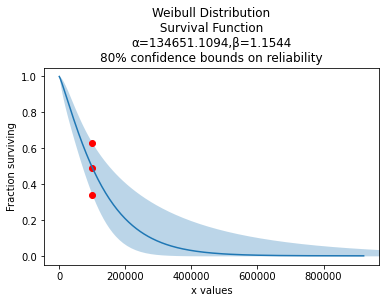

In [33]:
from reliability.Datasets import automotive
from reliability.Fitters import Fit_Weibull_2P
import matplotlib.pyplot as plt

fit = Fit_Weibull_2P(failures=automotive().failures,right_censored=automotive().right_censored,show_probability_plot=False)

# we want to know the system reliability after 100000 miles
lower,point,upper = fit.distribution.SF(CI_x=100000,CI_type='reliability',CI=0.8)
plt.scatter([100000,100000,100000],[lower,point,upper],color='red')

print('Failures:',automotive().failures)
print('Right censored:',automotive().right_censored)
print('')
print("The 80% reliability estimates at 100000 miles are:")
print("lower bound: "+"{:.2%}".format(lower))
print("point estimate: "+"{:.2%}".format(point))
print("upper bound: "+"{:.2%}".format(upper))
plt.show()

## Optimal replacement time

When conducting maintenance planning, we must optimise the frequency of preventative maintenance (PM) for the minimum overall cost. If PM is conducted too frequently then we will have high costs, but if not conducted often enough then failures will result and we incur the higher cost of corrective maintenance (CM). Depending on the underlying failure distribution, it is possible to model these costs for a range of PM intervals, with the lowest cost per unit time resulting from the optimal replacement time. This function calculates the cost per unit time to determine how cost varies with replacement time. The cost model can be used for HPP (ie. the maintenance makes the system “as good as new”) or Power Law NHPP (ie. the maintenance makes the system “as good as old”). The default is for “as good as new”.

Cost in the above context should include all associated costs of PM and CM. These are not just the costs associated with parts and labor but may also include other costs such as system downtime (which may vary between PM and CM), loss of production output, customer satisfaction, etc. Some of these costs are difficult to quantify but organisations should strive to quantify all the costs of PM and system failure (requiring CM) if they want to accurately optimise their maintenance schedule.

### Example 1

In the example below, we provide the cost of preventative maintenance (cost_PM), and the cost of corrective maintenance (cost_CM), as well as the Weibull parameters of the failure distribution. Leaving the default outputs, we obtain a plot of the cost per unit time and the printed results. This example is based of the example provided on the reliasoft article.

Results from optimal_replacement_time:
Cost model assuming as good as new replacement (q=0):
The minimum cost per unit time is 0.0 
The optimal replacement time is 493.19


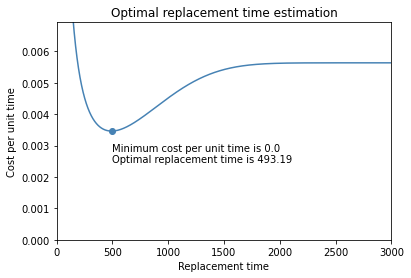

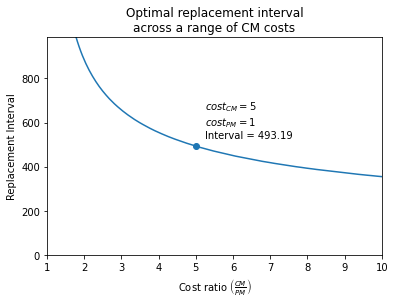

In [40]:
from reliability.Repairable_systems import optimal_replacement_time
import matplotlib.pyplot as plt
optimal_replacement_time(cost_PM=1, cost_CM=5, weibull_alpha=1000, weibull_beta=2.5,q=0)
plt.show()

## ROCOF

Rate of occurrence of failures (ROCOF) is used to model the trend (constant, increasing, decreasing) in the failure interarrival times. For a repairable system, we want the ROCOF to be improving (failure interarrival times to be increasing). As failure times can often appear quite random, it is necessary to conduct a statistical test to determine if there is a statistically significant trend, and if there is a trend we can then model that trend using a Power Law NHPP. The test for statistical significance is the Laplace test which compares the Laplace test statistic (U) with the z value (z_crit) from the standard Normal Distribution. If there is a statistically significant trend, the parameters of the model (Lambda_hat and Beta_hat) are calculated. By default the results are printed and a plot of the failure interarrival times and MTBF is plotted.

### Example1

In the example below, we provide the failure interarrival times. The function will run the Laplace test using the default 95% confidence interval and then, when a trend is found, it will plot the MTBF based on the calculated NHPP Power Law model. MTBF = 1/ROCOF. This example is based on Example 5.11 (p275) from Reliability Engineering and Risk analysis listed in the recommended resources.

Results from ROCOF analysis:
Laplace test results: U = 2.409, z_crit = (-1.96,+1.96)
At 95% confidence level the ROCOF is WORSENING. Assume NHPP.
ROCOF assuming NHPP has parameters: Beta_hat = 1.588 , Lambda_hat = 3.7027e-05


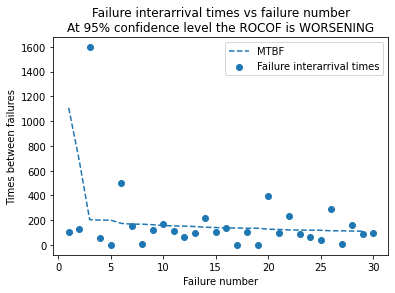

In [39]:
from reliability.Repairable_systems import ROCOF
import matplotlib.pyplot as plt
t = [104,131,1597,59,4,503,157,6,118,173,114,62,101,216,106,140,1,102,3,393,96,232,89,61,37,293,7,165,87,99]
ROCOF(times_between_failures=t)
plt.show()

## Chi-squared test

The Chi-squared test is a statistical test for goodness of fit to determine whether we can accept or reject the hypothesis that the data is from the specified distribution at the specified level of significance. This method is not a means of comparing distributions (which can be done with AICc, BIC, and AD), but instead allows us to accept or reject a hypothesis that data come from a distribution. Note that the result is sensitive to the bins. For this reason, it is recommended to leave bins as the default value.

The procedure for the test involves comparing the fitted CDF (from a hypothesised distribution) against the empirical CDF (from a cumulative histogram of the data). As with all histograms, the exact shape of the histogram depends on the bins. The difference between the fitted CDF and the empirical CDF is used to find the chi-squared statistic. The specified level of significance (analogous to confidence level), the number of parameters in the hypothesised distribution, and the number of data points is used to obtain the chi-squared critical value from the chi-squared distribution. By comparing the chi-squared statistic with the chi-squared critical value, we can determine whether the hypothesis (that the data are from the specified distribution) should be rejected or accepted. The acceptance criteria is when the the chi-squared statistic is below the critical value.

### Example 1

In the example below we import a dataset called mileage which contains 100 values that appear to be normally distributed. Using the function chi2test we can determine whether we should accept the hypothesis that the data are from a Normal distribution with parameters mu=30011 and sigma=10472. This example is based on Example 2.31 (page 63) of Reliability Engineering and Risk Analysis (listed in recommended resources).

Results from Chi-squared test:
Chi-squared statistic: 3.1294947845652
Chi-squared critical value: 12.591587243743977
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a normal distribution (μ=30011,σ=10472)


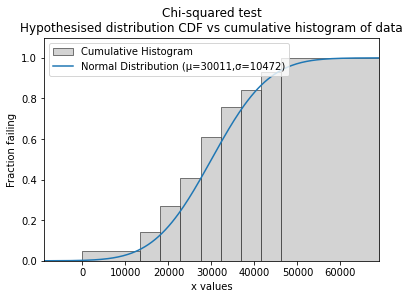

In [36]:
from reliability.Datasets import mileage
from reliability.Distributions import Normal_Distribution
from reliability.Reliability_testing import chi2test
import numpy as np
import matplotlib.pyplot as plt

data = mileage().failures
dist = Normal_Distribution(mu=30011, sigma=10472)
bins = [0, 13417, 18104, 22791, 27478, 32165, 36852, 41539, 46226, np.inf] #it is not necessary to specify the bins and leaving them unspecified is usually best
chi2test(distribution=dist, data=data, bins=bins)
plt.show()

## Kolmogorov-Smirnov test

The Kolmogorov-Smirnov test is a statistical test for goodness of fit to determine whether we can accept or reject the hypothesis that the data is from the specified distribution at the specified level of significance. This method is not a means of comparing distributions (which can be done with AICc, BIC, and AD), but instead allows us to accept or reject a hypothesis that data come from a distribution. Unlike the chi-squared test, the Kolmogorov-Smirnov test does not depend on the bins of a histogram, therefore making it a more consistent goodness of fit.

The procedure for the test involves comparing the fitted CDF (from a hypothesised distribution) against the empirical CDF (calculated using a rank order of the data of the form i/n). The difference between the fitted CDF and the empirical CDF is used to find the Kolmogorov-Smirnov statistic. The specified level of significance (analogous to confidence level) and the number of data points is used to obtain the Kolmogorov-Smirnov critical value from the Kolmogorov-Smirnov distribution. By comparing the Kolmogorov-Smirnov statistic with the Kolmogorov-Smirnov critical value, we can determine whether the hypothesis (that the data are from the specified distribution) should be rejected or accepted. The acceptance criteria is when the the Kolmogorov-Smirnov statistic is below the critical value.

### Example 1

In the example below we import a dataset called mileage which contains 100 values that appear to be normally distributed. Using the function KStest we can determine whether we should accept the hypothesis that the data are from a Normal distribution with parameters mu=30011 and sigma=10472.

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.07162465859560846
Kolmogorov-Smirnov critical value: 0.1340279164856987
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a normal distribution (μ=30011,σ=10472)


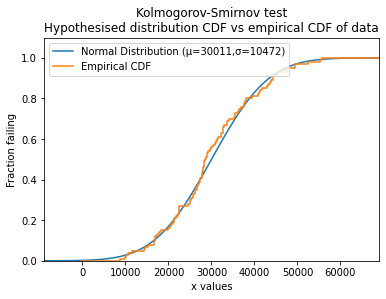

si valor estadistico es menor que valor critico se acepta la data de la distribución


In [38]:
from reliability.Datasets import mileage
from reliability.Distributions import Normal_Distribution
from reliability.Reliability_testing import KStest
import matplotlib.pyplot as plt

# Data Real
data = mileage().failures
# Data Distribucion
dist = Normal_Distribution(mu=30011, sigma=10472)
KStest(distribution=dist, data=data)
plt.show()
print("si valor estadistico es menor que valor critico se acepta la data de la distribución")